In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



plt.rcParams['figure.figsize'] = 18, 5
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [3]:


lst = [ "ac", "tv", "wm"]
path1 = "C:/Users/anand/Downloads/"
df_lst = []


for i in lst:
 
    df = pd.read_csv(f"{path1}c_{i}.csv")
    
   
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    

    df = df[[f"{i}_A", f"{i}_C"]]  # Adjust column names
    
    
    df.rename(columns={f"{i}_A": f"{i}_value",f"{i}_C": f"{i}_current"}, inplace=True)  # Adjust column names
    
    
    df_lst.append(df)


aggregate_data = pd.concat(df_lst, axis=1)


aggregate_data['aggregate_value'] = aggregate_data.filter(like='_value').sum(axis=1)

aggregate_data['aggregate_current'] = aggregate_data.filter(like='_current').sum(axis=1)





In [118]:


aggregate_data



,ac_value,ac_current,tv_value,tv_current,wm_value,wm_current,aggregate_value,aggregate_current
Timestamp,,,,,,,,
2013-06-12 06:26:28,NaN,NaN,74.77,0.34,NaN,NaN,74.77,0.34
2013-06-12 06:26:29,NaN,NaN,74.43,0.34,NaN,NaN,74.43,0.34
2013-06-12 06:26:30,NaN,NaN,74.76,0.34,NaN,NaN,74.76,0.34
2013-06-12 06:26:31,NaN,NaN,74.83,0.34,NaN,NaN,74.83,0.34
2013-06-12 06:26:32,NaN,NaN,74.54,0.34,NaN,NaN,74.54,0.34
...,...,...,...,...,...,...,...,...
2013-08-03 17:32:16,1695.33,8.43,NaN,NaN,NaN,NaN,1695.33,8.43
2013-08-03 17:32:17,1698.77,8.45,NaN,NaN,NaN,NaN,1698.77,8.45
2013-08-03 17:32:18,1697.96,8.44,NaN,NaN,NaN,NaN,1697.96,8.44


In [4]:
aggregate_data = aggregate_data.groupby(aggregate_data.index).sum()


In [120]:
aggregate_data

,ac_value,ac_current,tv_value,tv_current,wm_value,wm_current,aggregate_value,aggregate_current
Timestamp,,,,,,,,
2013-06-12 06:26:28,0.00,0.00,74.77,0.34,0.00,0.00,74.77,0.34
2013-06-12 06:26:29,0.00,0.00,74.43,0.34,0.00,0.00,74.43,0.34
2013-06-12 06:26:30,0.00,0.00,74.76,0.34,0.00,0.00,74.76,0.34
2013-06-12 06:26:31,0.00,0.00,74.83,0.34,0.00,0.00,74.83,0.34
2013-06-12 06:26:32,0.00,0.00,74.54,0.34,0.00,0.00,74.54,0.34
...,...,...,...,...,...,...,...,...
2013-08-03 17:32:16,1695.33,8.43,0.00,0.00,0.00,0.00,1695.33,8.43
2013-08-03 17:32:17,1698.77,8.45,0.00,0.00,0.00,0.00,1698.77,8.45
2013-08-03 17:32:18,1697.96,8.44,0.00,0.00,0.00,0.00,1697.96,8.44


In [5]:

def get_devices_running(row):
    devices = []
    for appliance in lst:
        value_col = f"{appliance}_value"
        current_col = f"{appliance}_current"
        if row[value_col] > 0 and row[current_col] > 0:
            devices.append(appliance)
    return '+'.join(devices)


In [6]:


aggregate_data['device_running'] = aggregate_data.apply(get_devices_running, axis=1)


In [7]:
aggregate_data.fillna(value=0, inplace=True)

In [8]:
aggregate_data['device_running'].unique()

array(['tv', 'ac', 'ac+tv', 'wm', 'tv+wm', ''], dtype=object)

In [125]:
# aggregate_data[aggregate_data['device_running'] == '']    

In [18]:
aggregate_data


,ac_value,ac_current,tv_value,tv_current,wm_value,wm_current,aggregate_value,aggregate_current,device_running
Timestamp,,,,,,,,,
2013-06-12 06:26:28,0.00,0.00,74.77,0.34,0.00,0.00,74.77,0.34,tv
2013-06-12 06:26:29,0.00,0.00,74.43,0.34,0.00,0.00,74.43,0.34,tv
2013-06-12 06:26:30,0.00,0.00,74.76,0.34,0.00,0.00,74.76,0.34,tv
2013-06-12 06:26:31,0.00,0.00,74.83,0.34,0.00,0.00,74.83,0.34,tv
2013-06-12 06:26:32,0.00,0.00,74.54,0.34,0.00,0.00,74.54,0.34,tv
...,...,...,...,...,...,...,...,...,...
2013-08-03 17:32:16,1695.33,8.43,0.00,0.00,0.00,0.00,1695.33,8.43,ac
2013-08-03 17:32:17,1698.77,8.45,0.00,0.00,0.00,0.00,1698.77,8.45,ac
2013-08-03 17:32:18,1697.96,8.44,0.00,0.00,0.00,0.00,1697.96,8.44,ac


In [48]:
tv_running_data = aggregate_data[aggregate_data['device_running'].str.contains('ac')]


print("Aggregate values where TV is running:")
tv_running_data[tv_running_data['device_running']== 'ac+tv']

Aggregate values where TV is running:


,ac_value,ac_current,tv_value,tv_current,wm_value,wm_current,aggregate_value,aggregate_current,device_running
Timestamp,,,,,,,,,
2013-06-12 15:39:52,388.54,1.91,74.18,0.35,0.00,0.00,462.72,2.26,ac+tv
2013-06-12 15:39:53,388.32,1.90,74.01,0.35,0.00,0.00,462.33,2.25,ac+tv
2013-06-12 15:39:54,388.33,1.91,74.23,0.35,0.00,0.00,462.56,2.26,ac+tv
2013-06-12 15:39:55,387.33,1.90,74.13,0.35,0.00,0.00,461.46,2.25,ac+tv
2013-06-12 15:39:56,386.97,1.90,74.14,0.35,0.00,0.00,461.11,2.25,ac+tv
...,...,...,...,...,...,...,...,...,...
2013-08-01 16:02:07,1778.31,8.38,73.67,0.34,0.00,0.00,1851.98,8.72,ac+tv
2013-08-01 16:02:08,1781.71,8.39,73.91,0.35,0.00,0.00,1855.62,8.74,ac+tv
2013-08-01 16:02:09,1777.78,8.38,73.69,0.34,0.00,0.00,1851.47,8.72,ac+tv


In [22]:
aggregate_data


,ac_value,ac_current,tv_value,tv_current,wm_value,wm_current,aggregate_value,aggregate_current,device_running
Timestamp,,,,,,,,,
2013-06-12 06:26:28,0.00,0.00,74.77,0.34,0.00,0.00,74.77,0.34,tv
2013-06-12 06:26:29,0.00,0.00,74.43,0.34,0.00,0.00,74.43,0.34,tv
2013-06-12 06:26:30,0.00,0.00,74.76,0.34,0.00,0.00,74.76,0.34,tv
2013-06-12 06:26:31,0.00,0.00,74.83,0.34,0.00,0.00,74.83,0.34,tv
2013-06-12 06:26:32,0.00,0.00,74.54,0.34,0.00,0.00,74.54,0.34,tv
...,...,...,...,...,...,...,...,...,...
2013-08-03 17:32:16,1695.33,8.43,0.00,0.00,0.00,0.00,1695.33,8.43,ac
2013-08-03 17:32:17,1698.77,8.45,0.00,0.00,0.00,0.00,1698.77,8.45,ac
2013-08-03 17:32:18,1697.96,8.44,0.00,0.00,0.00,0.00,1697.96,8.44,ac


naive bayesian classifier 

In [128]:


X = aggregate_data[['aggregate_value','aggregate_current']]
y = aggregate_data['device_running']


In [129]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


clf1 = GaussianNB()
clf1.fit(X_train, y_train)


GaussianNB()

In [130]:


y_pred = clf1.predict(X_test)


In [131]:


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.946343256155825


In [132]:



custom_input = pd.DataFrame({
    'aggregate_value':[1733.68],
    'aggregate_current':[7.88]
})


predictions = clf1.predict(custom_input)


print("Predictions:", predictions)


Predictions: ['ac']


knn 

In [133]:


X = aggregate_data[['aggregate_value','aggregate_current']]
y = aggregate_data['device_running']


In [134]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)


In [135]:


k = 5  
clf2 = KNeighborsClassifier(n_neighbors=k)
clf2.fit(X_train, y_train)


KNeighborsClassifier()

In [136]:


y_pred = clf2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9828641370869033


In [137]:



custom_input = pd.DataFrame({
    'aggregate_value':[78],
    'aggregate_current':[0.5]
})


predictions = clf2.predict(custom_input)


print("Predictions:", predictions)


Predictions: ['tv']


In [ ]:
best_xgb_model = XGBRegressor(n_estimators=best_params['n_estimators'],
                                                  max_depth=best_params['max_depth'],
                                                  learning_rate=best_params['learning_rate'],
                                                  subsample=best_params['subsample'],
                                                  reg_alpha=0.01,
                                                  reg_lambda=0.01)
                    best_xgb_

random forest classifier 

In [138]:

X = aggregate_data[['aggregate_value', 'aggregate_current']]
y = aggregate_data['device_running']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)


In [139]:

clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [140]:


y_pred = clf3.predict(X_test)



In [141]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9865361077111383


In [156]:


rf_classifier = RandomForestClassifier()


param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    # 'learning_rate': [0.1, 0.3, 0.5, 0.7],
    # 'subsample': [0.1, 0.5, 0.7, 0.8],
    # 'n_estimators': randint(10, 1000),  
    'max_depth': [2,5,10,20],      
    'min_samples_split': [2,5,10,20], 
    'min_samples_leaf': [2,5,10,20],  
    # 'bootstrap': [True, False]   
    'max_features': [10,20,50,100],
    'criterion':['gini','entropy']      
}




random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)
X = aggregate_data[['aggregate_value', 'aggregate_current']]
y = aggregate_data['device_running']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best Parameters:", best_params)


best_rf_model = random_search.best_estimator_


accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 20, 'max_depth': 20, 'criterion': 'gini'}
Accuracy: 0.9877600979192166


In [10]:
X = aggregate_data[['aggregate_value', 'aggregate_current']]
y = aggregate_data['device_running']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)


In [11]:
clf5 = RandomForestClassifier(n_estimators =50, min_samples_split = 20, min_samples_leaf= 5, max_features= 20, max_depth =20, criterion= 'gini')
clf5.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=20, min_samples_leaf=5,
                       min_samples_split=20, n_estimators=50)

In [13]:
y_pred = clf5.predict(X_test)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9877600979192166


c:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.98861957 0.98812904 0.98872994 0.98807385 0.98839876]
Average cross-validation score: 0.9883902314700238


c:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Confusion matrix:
[[     0      0      0      0      0      2]
 [     0 309563   3113      0      0      0]
 [     0   6296  22124      0      0      5]
 [     0      0      0 446696      0      0]
 [     0      3      0     40    110     23]
 [     0      4      5      0      7  27443]]


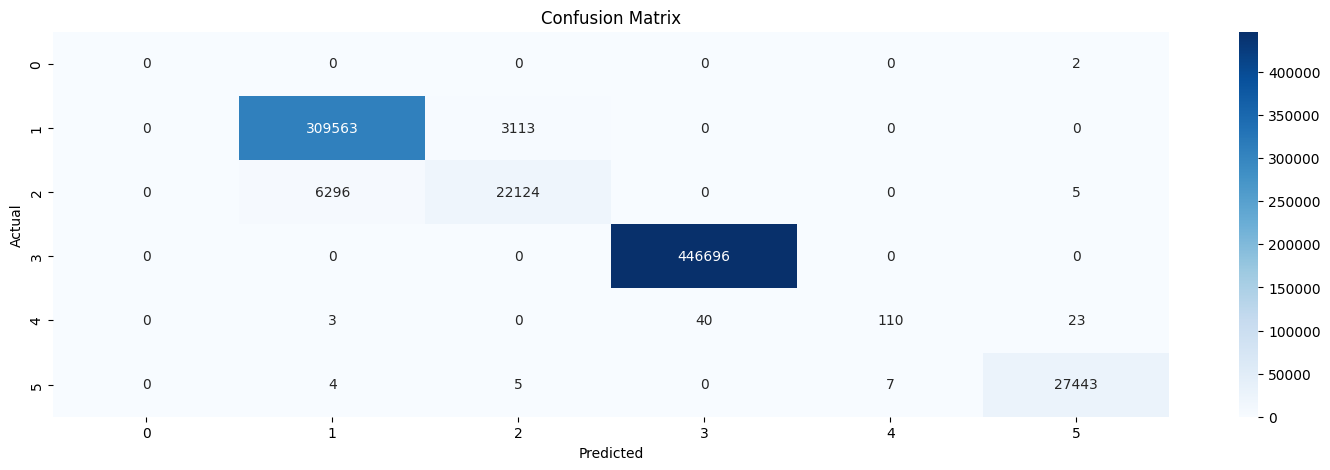

Classification Report:


c:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

                   0.00      0.00      0.00         2
          ac       0.98      0.99      0.99    312676
       ac+tv       0.88      0.78      0.82     28425
          tv       1.00      1.00      1.00    446696
       tv+wm       0.94      0.62      0.75       176
          wm       1.00      1.00      1.00     27459

    accuracy                           0.99    815434
   macro avg       0.80      0.73      0.76    815434
weighted avg       0.99      0.99      0.99    815434

Feature Importances:
[0.04500419 0.95499581]


c:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:


cv_scores = cross_val_score(clf5, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())


y_pred_cv = cross_val_predict(clf5, X_train, y_train, cv=5)


conf_matrix = confusion_matrix(y_train, y_pred_cv)
print("Confusion matrix:")
print(conf_matrix)


sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:")
print(classification_report(y_train, y_pred_cv))


feature_importances = clf5.feature_importances_
print("Feature Importances:")
print(feature_importances)


In [143]:



custom_input = pd.DataFrame({
    'aggregate_value':[337],
    'aggregate_current':[1.5]
})


predictions = clf3.predict(custom_input)


print("Predictions:", predictions)


Predictions: ['ac']


logistic regression 

In [144]:



X = aggregate_data[['aggregate_current', 'aggregate_value']]


y = aggregate_data['device_running']


In [145]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)


In [146]:


clf4 = LogisticRegression(max_iter=1000)  


clf4.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [147]:


y_pred = clf4.predict(X_test)


In [148]:


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9657282741738066


In [ ]:



custom_input = pd.DataFrame({
    'aggregate_current':[8.6],
    'aggregate_value':[300],
   
})


predictions = clf4.predict(custom_input)


print("Predictions:", predictions)


Predictions: ['ac']


In [149]:




with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(clf1, file)


with open('knn_model.pkl', 'wb') as file:
    pickle.dump(clf2, file)


with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf3, file)


with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clf4, file)

    


In [15]:
with open('random_forest_model_main.pkl', 'wb') as file :
    pickle.dump(clf5, file)

In [50]:



with open('random_forest_model_main.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


custom_input = pd.DataFrame({
    'aggregate_value': [2850],
    'aggregate_current': [4.3]
})



predictions = loaded_model.predict(custom_input)

print("Predictions:", predictions)


Predictions: ['ac+tv']


ensemble of knn, nb , logistic regression and random forest classifier 

In [ ]:


X = aggregate_data[['aggregate_current', 'aggregate_value']]



y = aggregate_data['device_running']


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)


In [ ]:


clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf4 = LogisticRegression(max_iter=1000)


In [ ]:


ensemble_classifier = VotingClassifier(estimators=[
    ('knn', clf1),
    ('nb', clf2),
    ('rf', clf3),
    ('logistic', clf4)
], voting='hard')


In [ ]:


ensemble_classifier.fit(X_train, y_train)


y_pred = ensemble_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9718482252141983


In [ ]:



custom_input = pd.DataFrame({
    'aggregate_current':[8.6],
    'aggregate_value':[300]
    
})


predictions = ensemble_classifier.predict(custom_input)



print("Predictions:", predictions)


Predictions: ['ac+tv']


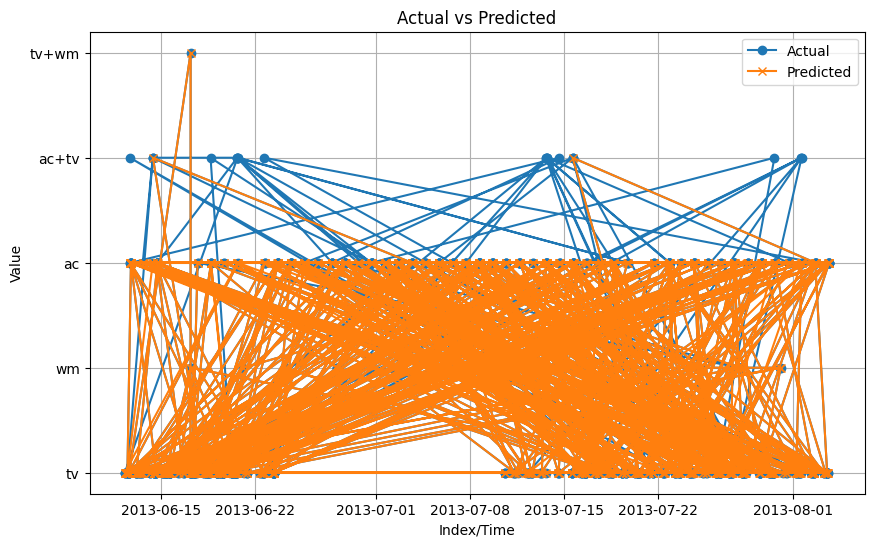

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
plt.xlabel('Index/Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


total_predicted = y_pred.sum()
total_actual = y_test.sum()

plt.figure(figsize=(6, 4)) 
plt.plot([0, 1], [total_actual, total_actual], label='Actual', marker='o', linestyle='--')
plt.plot([0, 1], [total_predicted, total_predicted], label='Predicted', marker='x', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Overall')
plt.title('Overall Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.xticks([0, 1], ['Actual', 'Predicted'])


plt.savefig('predicted_vs_actual.png')


plt.close()
